## Problem Statement

Lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders.

### Business Understanding
Lending Club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_rows = 500

In [88]:
loan_data = pd.read_csv('loan.csv', encoding = "ISO-8859-1", low_memory=False)

In [89]:
loan_data.shape

(39717, 111)

In [90]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Understanding

In [91]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [92]:
# Function to get value_counts of any column
def get_value_counts(col, df_data):
    count = df_data[col].value_counts()
    return count

## Data cleaning

In [93]:
# Check for duplicate rows in dataset based on id column
loan_data[loan_data.duplicated(['id', 'member_id'])]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [94]:
# Function to get missing values percentage
def miss_values(df_miss):
    return round(100*df_miss.isnull().sum()/len(df_miss), 2)

In [95]:
# Check how many rows have all missing values
print("Column count", loan_data.isnull().all().sum())
missing_data = miss_values(loan_data)
missing_data.sort_values(ascending=False)

Column count 54


total_il_high_credit_limit        100.00
mo_sin_old_rev_tl_op              100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt                      100.00
total_bc_limit                    100.00
dti_joint       

In [96]:
for i in range(0,100,10):
    per = len(missing_data.loc[missing_data > i])
    print(f"{per} Columns with more than {i}% missing values")
per = len(missing_data.loc[missing_data == 100])
print(f"{per} Columns with 100% missing values")

68 Columns with more than 0% missing values
58 Columns with more than 10% missing values
58 Columns with more than 20% missing values
58 Columns with more than 30% missing values
57 Columns with more than 40% missing values
57 Columns with more than 50% missing values
57 Columns with more than 60% missing values
56 Columns with more than 70% missing values
56 Columns with more than 80% missing values
56 Columns with more than 90% missing values
54 Columns with 100% missing values


So there are **```54 columns```** with **```100% missing values```** So these columns won't help in analysis. We can drop such columns.

In [97]:
columns_with_missing_values = list(missing_data[missing_data >= 50].index)
loan_data.drop(columns_with_missing_values, axis=1, inplace=True)
loan_data.shape

(39717, 54)

In [98]:
# Check number of unique values from all columns
unique_column_data = loan_data.nunique().sort_values()
unique_column_data

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [99]:
# List of columns with only one unique value
col_list = list(unique_column_data[unique_column_data == 1].index)
col_list

['tax_liens',
 'delinq_amnt',
 'chargeoff_within_12_mths',
 'acc_now_delinq',
 'application_type',
 'policy_code',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'pymnt_plan']

These are few columns having only one unique values. So these columns won't help in analysis.

Some other columns which are no longer useful.

**```1.id```** Unique id given to loan, doesn't help to analysis

**```2.member_id```** Unique id given to loan, doesn't help to analysis

**```3.url```** URL for LC page with listing page, which has mothing to do with loan

**```4.desc```** Loan description provided by borrower

**```5.zip_code```** First 3 numbers of zip code are given, doesn't help to analysis

**```6.emp_title```** Job description provided by borrower
    
**```7.funded_amnt```** Value for this column is equivalent to column loan_amnt.


**Drop above columns from dataframe**

In [100]:
# Cutomer behaviour columns
redundant_col = ['funded_amnt', 'url', 'desc', 'zip_code', 'id', 'member_id', 'emp_title']
col_list.extend(redundant_col)

In [101]:
# Drop all redundant columns
loan_data.drop(col_list, axis=1, inplace=True)
loan_data.shape

(39717, 38)

#### We have few more cutomer behavioural columns. We can drop these columns

**```delinq_2yr```**

**```earliest_cr_line```**

**```inq_last_6mths```**

**```open_acc```**

**```pub_rec```**

**```revol_bal```**

**```revol_util```**

**```total_acc```**

**```out_prncp```**

**```out_prncp_inv```**

**```total_pymnt```**

**```total_pymnt_inv```**

**```total_rec_prncp```**

**```total_rec_int```**

**```total_rec_late_fee```**

**```recoveries```**

**```collection_recovery_fee```**

**```last_pymnt_d```**

**```last_pymnt_amnt```**

**```last_credit_pull_d```**

**```application_type```**


In [102]:
col_list_drop = ['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 
                 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
                 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
                 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'title']

In [103]:
# Cutomer behaviour columns
loan_data.drop(col_list_drop, axis=1, inplace=True)
loan_data.shape

(39717, 17)

In [104]:
# List of rows containing null values
remaining_miss_data = miss_values(loan_data)
remaining_miss_data[remaining_miss_data!=0]

emp_length              2.71
pub_rec_bankruptcies    1.75
dtype: float64

**Drop rows with NULL values from dataframe**

**```pub_rec_bankruptcies```** column has **1.75% i.e 697** records of missing data. It gives information about number of bankruptcies.

1.75% of data is negligible as compare to overall dataset. We decided to drop those rows so, we don't get any bias data.

In [105]:
loan_data['pub_rec_bankruptcies'].isnull().sum()

697

In [106]:
get_value_counts('pub_rec_bankruptcies', loan_data)

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [107]:
# Drop rows containing null values from pub_rec_bankruptcies columns
loan_data = loan_data[~loan_data['pub_rec_bankruptcies'].isnull()]
loan_data.shape

(39020, 17)

**```emp_length```** column has 1075 records of missing data. It gives information about borrower's employment length in years.

In [108]:
loan_data['emp_length'].isnull().sum()

1075

In [109]:
get_value_counts('emp_length', loan_data)

10+ years    8760
< 1 year     4416
2 years      4304
3 years      4034
4 years      3391
5 years      3249
1 year       3148
6 years      2197
7 years      1751
8 years      1454
9 years      1241
Name: emp_length, dtype: int64

In [110]:
# Drop rows containing null values from emp_length columns
loan_data = loan_data[~loan_data['emp_length'].isnull()]
loan_data.shape

(37945, 17)

## Pie chart for loan status

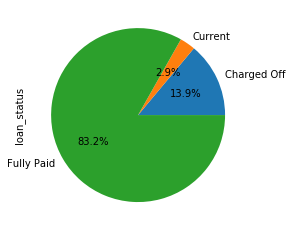

In [111]:
loan_data.groupby('loan_status').loan_status.count().plot(kind='pie',autopct='%1.1f%%')

Here we have around 2.9% of customer with status ```Current```. We can drop such rows.

In [112]:
# Drop with status Current
loan_data = loan_data[~(loan_data['loan_status'] == 'Current')]

In [113]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


### Derived columns for analysis

#### Extract only percentage of int_rate and  revol_util column and remove %

In [114]:
# Function to  remove % from  string of given column 
def remove_percentage_from_string(column_name):
    loan_data[column_name].replace("%", "", regex=True, inplace=True)
    loan_data[column_name] = loan_data[column_name].astype('float64')

In [115]:
# remove % from string of column int_rate
remove_percentage_from_string('int_rate')

# rename int_rate column as int_rate_percentage
loan_data.rename(columns={"int_rate": "int_rate_percentage"}, inplace=True)


Lets format **```emp_length```** column data

- emp_length this column give information about employement length in years. Values are between  0 and 10 where 0 means less than one year and 10 means ten or more years.

- Convert the column to values between 0 to 10

In [116]:
get_value_counts('emp_length', loan_data)

10+ years    8369
< 1 year     4341
2 years      4207
3 years      3951
4 years      3297
5 years      3161
1 year       3077
6 years      2136
7 years      1689
8 years      1410
9 years      1209
Name: emp_length, dtype: int64

In [117]:
dict_emp_length = {
    '10+ years' : 10, '< 1 year' : 0, '2 years' : 2, '3 years' : 3, '4 years' : 4, '5 years' : 5, 
    '1 year' : 1, '6 years' : 6, '7 years' : 7, '8 years' : 8, '9 years': 9
}

In [118]:
# replace years from string
loan_data = loan_data.replace({"emp_length": dict_emp_length})

# rename emp_length column as emp_length_years
loan_data.rename(columns={"emp_length": "emp_length_years"}, inplace=True)

**```term```** column give information about the number of payments on the loan. Values are in months and can be either 36 or 60.
Lets remove motnths string from given column

In [119]:
get_value_counts('term', loan_data)

 36 months    27590
 60 months     9257
Name: term, dtype: int64

In [120]:
# remove months from string
loan_data['term'] = loan_data.term.apply(lambda x: x.split()[0]).astype('float64')

# rename term column as term_months
loan_data.rename(columns={"term": "term_months"}, inplace=True)

#### Derive month and year from date
We have the following column with date information

- ```issue_d:``` The month in which loan was funded

Lets split date column into month and year column.


In [121]:
# funtion to derive month and year as format of given 4 column is same
def derive_month_year(column_name):
    date_frame = pd.to_datetime(loan_data[column_name], format='%b-%y')
    loan_data[f"{column_name}_month"] = date_frame.dt.month
    loan_data[f"{column_name}_year"] = date_frame.dt.year

In [122]:
derive_month_year('issue_d')

### Update column datatype

In [123]:
loan_data.dtypes

loan_amnt                 int64
funded_amnt_inv         float64
term_months             float64
int_rate_percentage     float64
installment             float64
grade                    object
sub_grade                object
emp_length_years          int64
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
issue_d_month             int64
issue_d_year              int64
dtype: object

In [124]:
# convert following columns to category type
column_to_category = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'pub_rec_bankruptcies']           
loan_data[column_to_category] = loan_data[column_to_category].apply(lambda x: x.astype('category'))

In [125]:
# convert following columns to float type
column_to_float = list(loan_data.dtypes[loan_data.dtypes == 'int64'].index)
loan_data[column_to_float] = loan_data[column_to_float].apply(lambda x: x.astype(np.float))

In [126]:
# loan_data.to_csv('clean_loan.csv', encoding='utf-8', index=False)

In [127]:
# Dataframe after droping customer behavioural column and Columns with all missing data
loan_data.shape

(36847, 19)

In [128]:
df = loan_data

## Univariate and Bivariate analysis

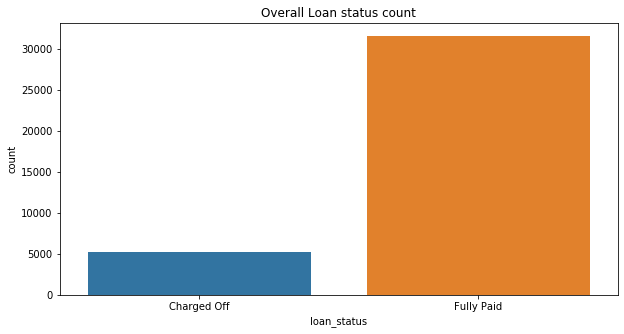

In [129]:
plt.figure(figsize=(10, 5))
sns.countplot(x='loan_status', data=df)
plt.title('Overall Loan status count')
plt.show()

In [130]:
print(round(df.groupby('loan_status')['loan_status'].count()/len(df['loan_status'])*100),2 )
df.pivot_table(values = 'loan_amnt', index = ['loan_status'], aggfunc = ['count', 'mean'])

loan_status
Charged Off    14.0
Fully Paid     86.0
Name: loan_status, dtype: float64 2


,count,mean
,loan_amnt,loan_amnt
loan_status,,
Charged Off,5281,12236.347283
Fully Paid,31566,10958.130584


 ### Inference
 - Most of the loans are ```Fully Paid```
 - Around 14% loans are ```Charged Off``` (defaulters)

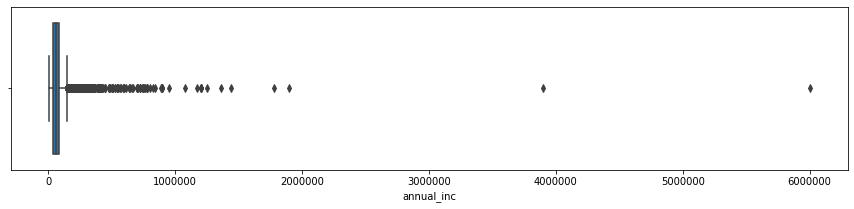

In [131]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=df['annual_inc'], data=df)

In [132]:
df.annual_inc.median()

60000.0

### Inference
- Annual income of borrowers varies from 4000 (min) to 6,000,000 (max).
- Median income is around 60000

In [133]:
# This method plots a distribution of target column, and its boxplot against loan_status column
def plot_distribution(dataframe, column, title):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    p = sns.distplot(dataframe[column], bins=20)
    plt.title(title)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[column], y=dataframe['loan_status'], data=dataframe)
    plt.title("Boxplot")
    plt.show()

## Loan amount distribution and Boxplot

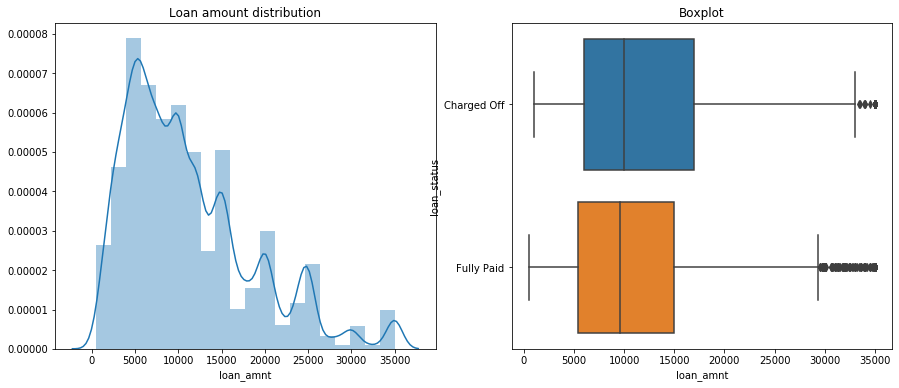

In [134]:
plot_distribution(df, 'loan_amnt', 'Loan amount distribution')

In [135]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5281.0,12236.347283,8103.456528,1000.0,6000.0,10000.0,16950.0,35000.0
Fully Paid,31566.0,10958.130584,7223.977380,500.0,5400.0,9600.0,15000.0,35000.0


### Inference
- The loan amount varies from 0 to 35,000
- Most of the loan amounts are in the range of 0-15K


## Interest rate percentage distribution and Boxplot

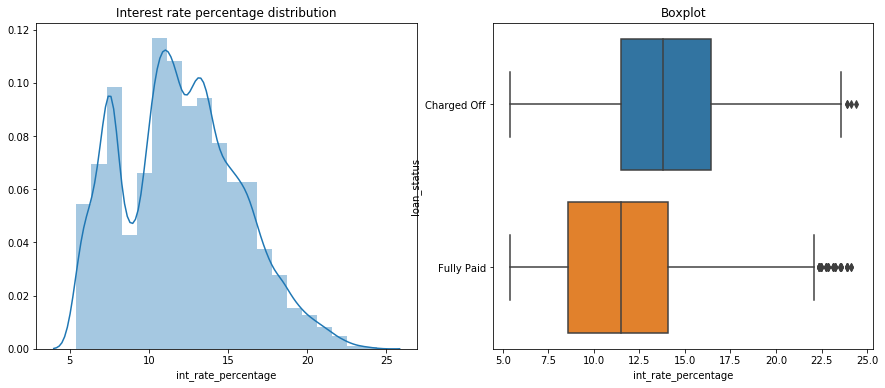

In [136]:
plot_distribution(df, 'int_rate_percentage', 'Interest rate percentage distribution')

In [137]:
df.groupby('loan_status')['int_rate_percentage'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5281.0,13.932233,3.652394,5.42,11.49,13.79,16.45,24.40
Fully Paid,31566.0,11.663133,3.609582,5.42,8.59,11.49,14.09,24.11


### Inference
- Interest rate percentage varies from 5.42% to 24.40%
- Average interest of Charged off (13.9%) is higher than Fully paid (11.6%)

## Installment distribution and Boxplot

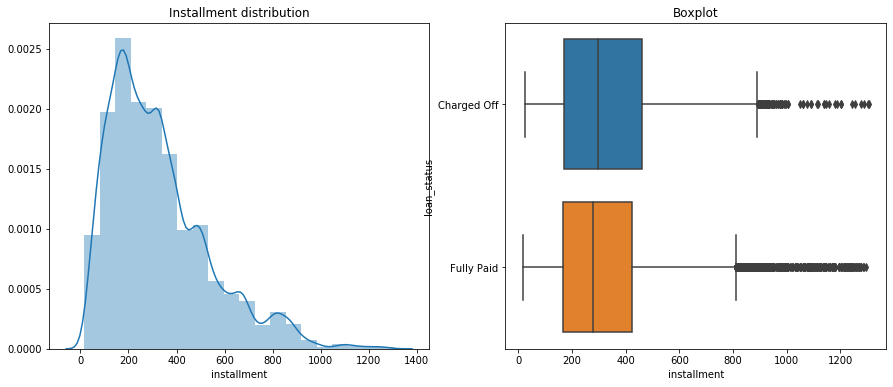

In [138]:
plot_distribution(df, 'installment', 'Installment distribution')

In [139]:
df.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5281.0,338.291574,216.140397,22.79,171.4400,296.72,459.600,1305.19
Fully Paid,31566.0,322.419822,207.564341,16.08,166.9025,277.98,424.225,1295.21


### Inference
- Charged Off
    - Installment amount varies from 22 to 1305 for Charged Off
    - Average installment amount is 339.51

- Fully Paid
    - Installment amount varies from 16 to 1295 for Charged Off
    - Average installment amount is 322.61

## dti distribution  and Boxplot

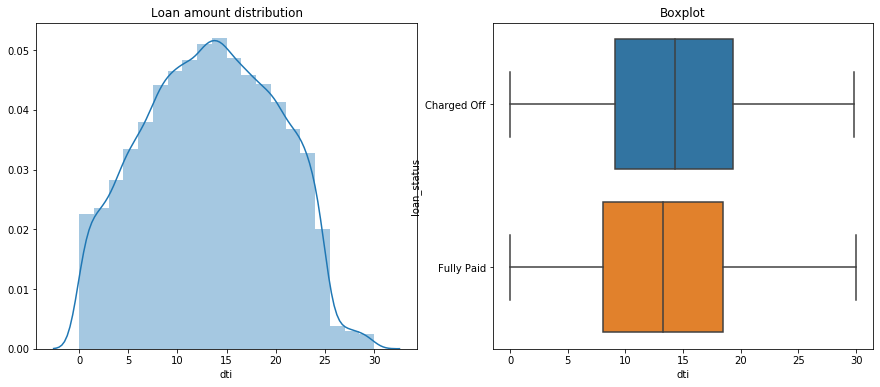

In [140]:
plot_distribution(df, 'dti', 'Loan amount distribution')

In [141]:
df.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5281.0,14.022721,6.559160,0.0,9.13,14.33,19.28,29.85
Fully Paid,31566.0,13.214632,6.659979,0.0,8.07,13.26,18.45,29.99


### Inference
- Charged Off
    - dti amount varies from 0 to 29.85 for Charged Off
    - Average dti is 14.05

- Fully Paid
    - dti amount varies from 0 to 29.99 for Fully paid
    - Average dti is 13.21


In [142]:
# Function to plat bar graph w.r.t given column
def categoryBarPlot(df, columns, against, agg='count'):
    rows = int(len(columns)/2)
    for index, value in enumerate(columns, start=1):
        plt.subplot(rows, 2, index)
        ax = df.groupby(value)[against].agg(agg).plot.bar(color=sns.color_palette('husl', 16))
        ax.set(title=f"{str.title(value)} {agg} plot")

    plt.tight_layout()

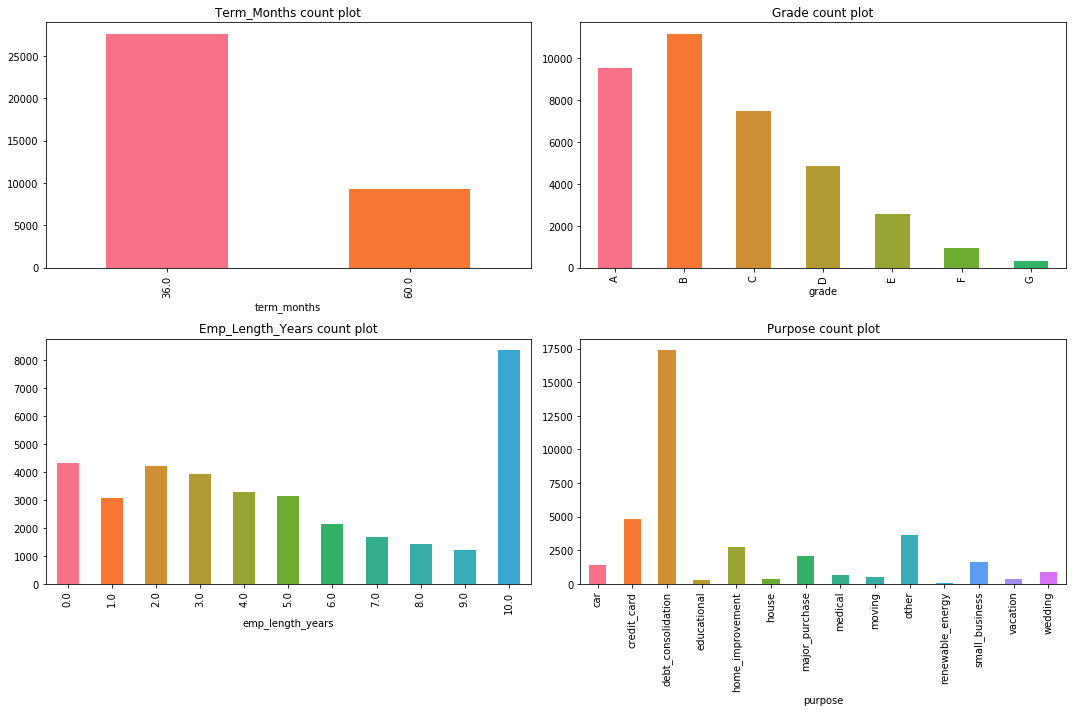

In [143]:
column_to_category = ['term_months', 'grade', 'emp_length_years', 'purpose']
plt.figure(figsize=(15,10))
categoryBarPlot(df, column_to_category, 'loan_amnt')

### Inference
- Most of the loans are for 36 months
- Most of the loans have grade of A and B,  i.e most of the loans are high graded loans.
- Most of the employees applying for loan have experience more than 10 years.
- Most of the loans are issued for the purpose of dept consolidation.

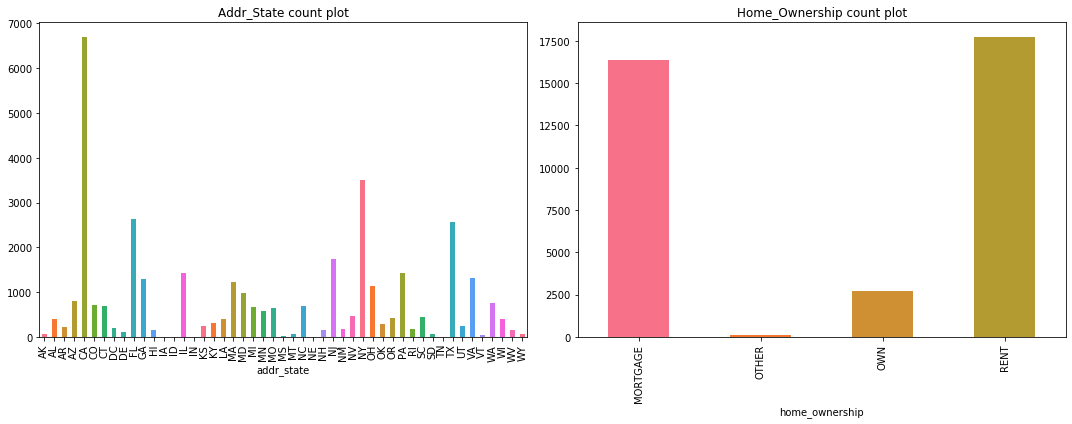

In [144]:
column_to_category = ['addr_state', 'home_ownership']
plt.figure(figsize=(15,6))
categoryBarPlot(df, column_to_category, 'loan_amnt')

### Inference
- Home ownership of most of the loan borrowers is RENT and MORTAGE
- Most of the loans are from California(CA), following that is from New york(NY) and Florida(FL)

## Loan issued year and month plot

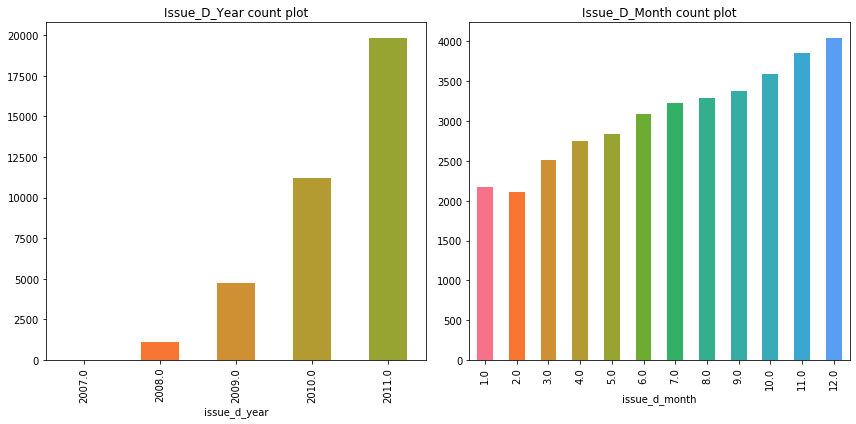

In [145]:
column_to_category = ['issue_d_year', 'issue_d_month']
plt.figure(figsize=(12,6))
categoryBarPlot(df, column_to_category, 'loan_amnt')

- LC has been giving loans from year 2007 to 2011.
- Most of the loans are given in ```2011``` year
- Most of the loans are issued in December

In [146]:
# Function to create bins
def create_bins(df, column, bins, labels):
    df[f'{column}_bins'] = pd.cut(df[column], bins=bins, labels=labels)

# Function to calulcate percentage of defaulter and non-defaulter w.r.t given column
def calculate_percentage_bin(df, on='loan_status', against=None):
    grp = df.groupby([on,against])[against].count()
    cnt = df.groupby(against)[against].count()
    percentages = grp.unstack() * 100 / cnt.T
    return percentages

## Segmented Univariate analysis

### Bins for loan_amnt

In [147]:
# Derived categorical variable. Derive bin of Loan amount in interval of 5000
bins=[x for x in range(0, 36000, 5000)]
labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)]
create_bins(df, 'loan_amnt', bins, labels)

In [148]:
# percentage of defaulter and non-defaulter w.r.t loan amount bins
percentages = calculate_percentage_bin(df, on='loan_status', against='loan_amnt_bins')
percentages

loan_amnt_bins,0-5k,5-10k,10-15k,15-20k,20-25k,25-30k,30-35k
loan_status,,,,,,,
Charged Off,13.4952,12.637273,13.422999,17.151024,18.579235,20.520231,24.166667
Fully Paid,86.5048,87.362727,86.577001,82.848976,81.420765,79.479769,75.833333


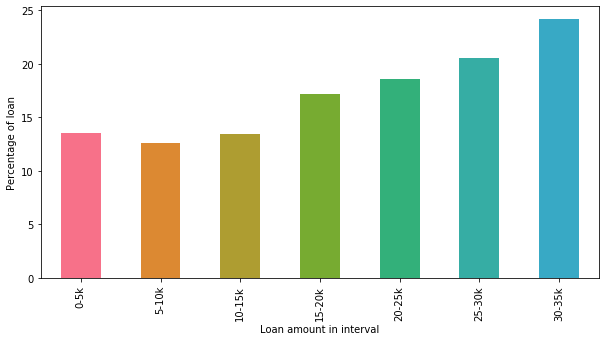

In [149]:
plt.figure(figsize=(10, 5))
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 10))
ax.set(xlabel="Loan amount in interval", ylabel="Percentage of loan")
plt.show()

### Inference
- The percentage of charged off loans increases as loan amount interval increases. Most of the loans are below 20K amount.


### Bins for income column

In [150]:
# Derived categorical variable. Derive dti in interval of 5%
bins=[0, 10000, 25000, 50000, 100000, 200000, 1000000, 6000000]
labels=['0-10K', '10-25k', '25-50k', '50-100k', '100-200k', '200-1000k', '1000k-6000k']
create_bins(df, 'annual_inc', bins, labels)

df['annual_inc_bins'].value_counts()

50-100k        17151
25-50k         12162
100-200k        4787
10-25k          2130
200-1000k        535
0-10K             69
1000k-6000k       13
Name: annual_inc_bins, dtype: int64

In [151]:
# percentage of defaulter and non-defaulter w.r.t annual_income bins
percentages = calculate_percentage_bin(df, on='loan_status', against='annual_inc_bins')
percentages

annual_inc_bins,0-10K,10-25k,25-50k,50-100k,100-200k,200-1000k,1000k-6000k
loan_status,,,,,,,
Charged Off,23.188406,18.497653,16.296662,13.515247,10.758304,10.280374,7.692308
Fully Paid,76.811594,81.502347,83.703338,86.484753,89.241696,89.719626,92.307692


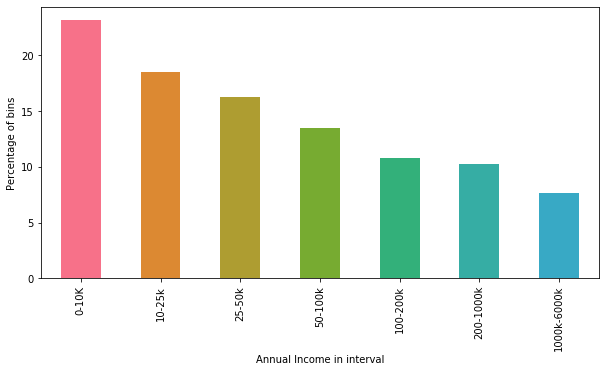

In [152]:
plt.figure(figsize=(10, 5))
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 10))
ax.set(xlabel="Annual Income in interval", ylabel="Percentage of bins")
plt.show()

### Inference
- Borrowers having Annual income in range of 0-10K has high rate of defaulter (23.18%), following that 10-25k and 25-50 has 18.49%, 13.51 respectively.

### Bins for dti column

In [153]:
# Derived categorical variable. Derive dti in interval of 5%
bins=[x for x in range(0, 35, 5)]
labels=[str(x)+'-'+str(x+5)+'%' for x in range (0, 30, 5)]
create_bins(df, 'dti', bins, labels)

In [154]:
# percentage of defaulter and non-defaulter w.r.t dti bins
percentages = calculate_percentage_bin(df, on='loan_status', against='dti_bins')
percentages

dti_bins,0-5%,5-10%,10-15%,15-20%,20-25%,25-30%
loan_status,,,,,,
Charged Off,12.182852,12.5,14.299632,15.494622,16.598231,13.255034
Fully Paid,87.817148,87.5,85.700368,84.505378,83.401769,86.744966


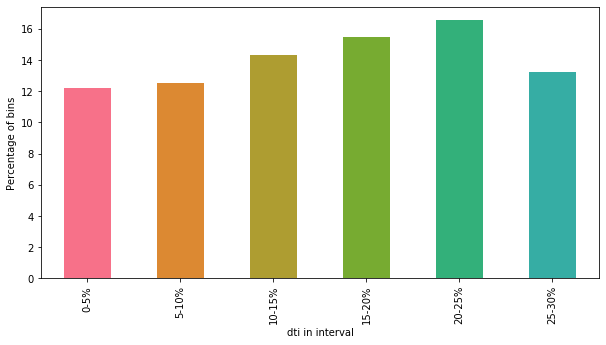

In [155]:
plt.figure(figsize=(10, 5))
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 10))
ax.set(xlabel="dti in interval", ylabel="Percentage of bins")
plt.show()

### Inference
- There is no much difference in the defaulters with respect dti percentage interval


### Bins for installment per month income

In [156]:
# derived new column --> installment_monthly_perc
# convert annual income to monthly and calulate  percentage w.r.t  installment 
df['installment_monthly_perc'] = df['installment']/df['annual_inc'].apply(lambda x: x/12)*100

In [157]:
# Derived categorical variable. Derive installment_monthly_perc in interval of 5%
bins=[x for x in range(0, 35, 5)]
labels=[str(x)+'-'+str(x+5)+'%' for x in range (0, 30, 5)]
create_bins(df, 'installment_monthly_perc', bins, labels)

In [158]:
df.installment_monthly_perc_bins.value_counts()

0-5%      15489
5-10%     14694
10-15%     5312
15-20%     1191
20-25%      144
25-30%       17
Name: installment_monthly_perc_bins, dtype: int64

In [159]:
percentages = calculate_percentage_bin(df, on='loan_status', against='installment_monthly_perc_bins')
percentages

installment_monthly_perc_bins,0-5%,5-10%,10-15%,15-20%,20-25%,25-30%
loan_status,,,,,,
Charged Off,11.814836,14.604601,19.088855,21.662469,20.833333,17.647059
Fully Paid,88.185164,85.395399,80.911145,78.337531,79.166667,82.352941


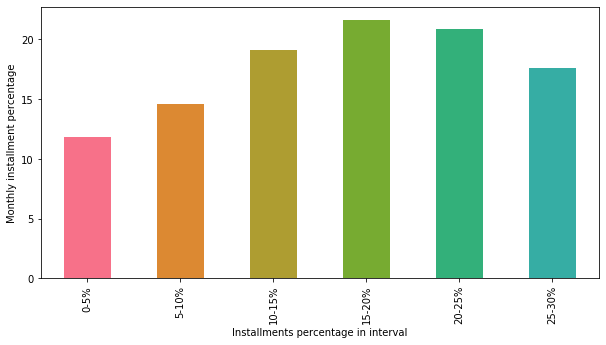

In [160]:
plt.figure(figsize=(10, 5))
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 10))
ax.set(xlabel="Installments percentage in interval", ylabel="Monthly installment percentage")
plt.show()

### Defaulters w.r.t terms purpose

In [161]:
# percentage of defaulter and non-defaulter w.r.t term months 
percentages = calculate_percentage_bin(df, on='loan_status', against='purpose')
percentages

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_status,,,,,,,,,,,,,,
Charged Off,10.621943,10.456155,15.117349,16.38796,11.72817,16.618911,10.043668,15.455951,14.917127,16.13082,19.148936,26.795413,14.619883,9.955257
Fully Paid,89.378057,89.543845,84.882651,83.61204,88.27183,83.381089,89.956332,84.544049,85.082873,83.86918,80.851064,73.204587,85.380117,90.044743


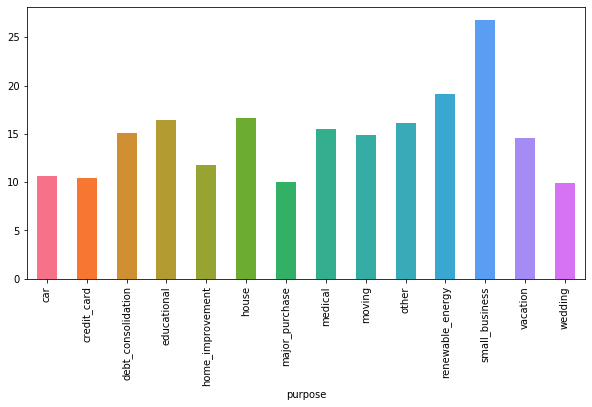

In [162]:
fig, ax = plt.subplots(figsize=(10,5))
percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16), ax=ax)
plt.show()

### Inference
- Default customer with purpose small business has high percentage (26.7 %)

### Defaulters w.r.t terms month

In [163]:
# percentage of defaulter and non-defaulter w.r.t term months 
percentages = calculate_percentage_bin(df, on='loan_status', against='term_months')
percentages

term_months,36.0,60.0
loan_status,,
Charged Off,10.710402,25.126931
Fully Paid,89.289598,74.873069


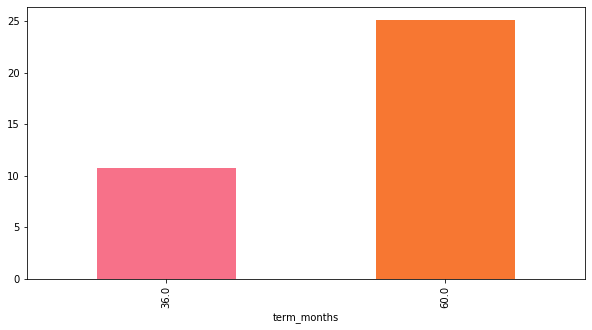

In [164]:
fig, ax = plt.subplots(figsize=(10,5))
percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16), ax=ax)
plt.show()

### Inference
- Default customer with terms 60 month (24.9 %) have more percentage than 30 month (10.5 %)
- Term month with 60 are seems to be high risky

### Defaulters w.r.t grade

In [165]:
# percentage of defaulter and non-defaulter w.r.t grade
percentages = calculate_percentage_bin(df, on='loan_status', against='grade')
percentages

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,5.799538,11.892377,16.751269,21.610518,26.692456,32.521186,33.783784
Fully Paid,94.200462,88.107623,83.248731,78.389482,73.307544,67.478814,66.216216


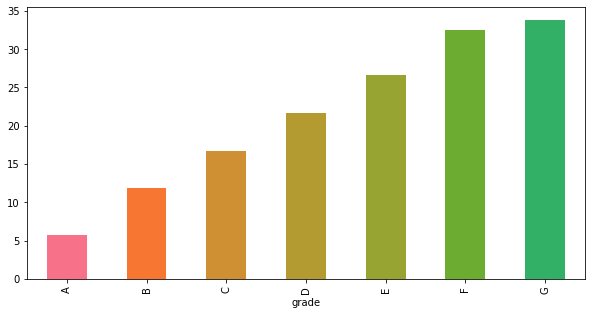

In [166]:
fig, ax = plt.subplots(figsize=(10,5))
percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16), ax=ax)
plt.show()

### Inference
- E, F and G grade have high percentage of defaulter
- E, F and G grade seems to be high risky

## Defaulter w.r.t emp_length

In [167]:
# percentage of defaulter and non-defaulter w.r.t emp_length_years
percentages = calculate_percentage_bin(df, on='loan_status', against='emp_length_years')
percentages

emp_length_years,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
loan_status,,,,,,,,,,,
Charged Off,14.098134,14.364641,13.216068,13.895216,13.648772,14.362543,14.09176,15.275311,14.184397,12.903226,15.569363
Fully Paid,85.901866,85.635359,86.783932,86.104784,86.351228,85.637457,85.90824,84.724689,85.815603,87.096774,84.430637


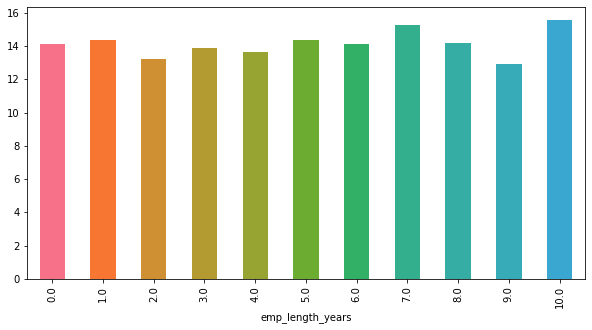

In [168]:
fig, ax = plt.subplots(figsize=(10,5))
percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16), ax=ax)
plt.show()

### Inference
- There is no much difference in the defaulters with respect to years of experience

### Loan status vs Purpose

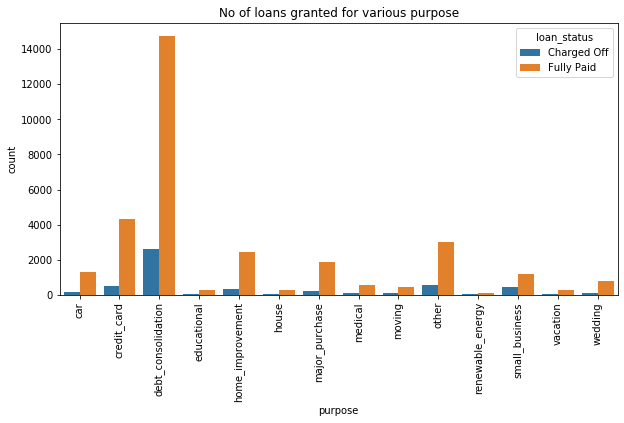

In [169]:
plt.figure(figsize=(10,5))
sns.countplot(x='purpose', hue='loan_status', data=df)
plt.title('No of loans granted for various purpose')
plt.xticks(rotation=90)
plt.show()

### Inference
- If you see the trend of the defaulters purpose for loan of most of the people are debt_consolidation, credit_card and home_improvement


### Default users w.r.t issue year and verification_status

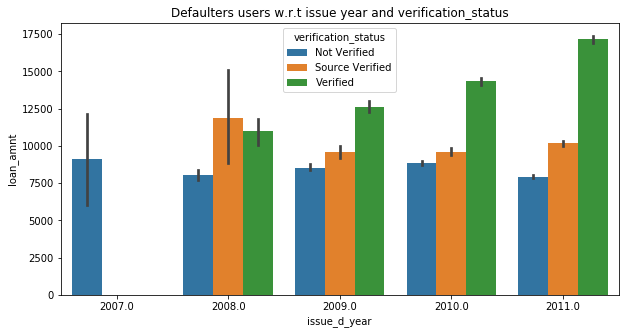

In [170]:
# Defaulters users w.r.t issue year and verification_status
plt.figure(figsize=(10,5))
ax = sns.barplot(x='issue_d_year', y='loan_amnt', hue='verification_status',data=df, estimator=np.mean)
ax.set(title = 'Defaulters users w.r.t issue year and verification_status')
plt.show()

Lending company really need to improve its verification process.
As we can see in graph, There is a lot money stuck under not verified 


(0.5, 18219.685113037754)

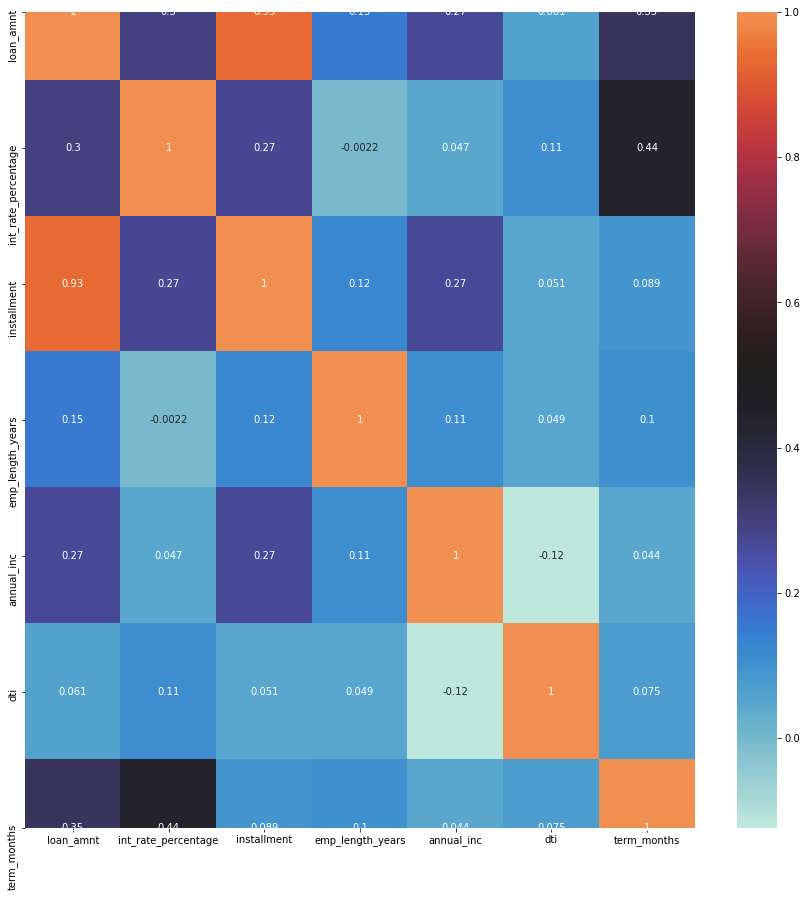

In [85]:
plt.figure(figsize=(15,15))
variables= ['loan_amnt', 'int_rate_percentage', 'installment',
       'emp_length_years', 'annual_inc', 'dti', 'term_months',
       ]
corr = df[variables].corr()
sns.heatmap(corr, annot=True, center=0.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Conslusion
After studying and analyzing all the data , we conclude following  categorical and quantitative fields which are impacting defaulters and increased risk factor to lending company.

- ```Term```: Duration of loan having 60 month  is impacting more as compare to 36 month.
- ```Verification```: Lending company really need to improve its verification process. Non verified customers are more in number 
- ```Grade```: E, F, G grade has high percentage of defaulter which seems to be risky.
- ```Purpose```: Customer having purpose as Small business , house , renewable energy  seems to be more defaulters.
- ```Annual Income```: Annual income in range of 0 to 50K are seems to be more defaulter
- There is no much difference in the defaulters with respect to employee years of experience
- Most of the loans are from California(CA), following that is from Newyork(NY) and Florida(FL)state